In [2]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0



                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

[+] 0.0s
[+] 0.1s
pkgs/main/linux-64 ━━━━━━━━━━━━━━━╸━━━━━━━━━   0.0 B /  ??.?MB @ 

In [3]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [18]:
#Question#1: Use yfinance to Extract Stock Data
tesla=yf.Ticker('TSLA')


In [19]:
tesladata = tesla.history(period="max")

In [20]:
tesladata.reset_index(inplace=True)
tesladata.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


In [37]:
GMEdata=yf.Ticker("GME")

In [38]:
html_data=GMEdata.history(period="max")
html_data.reset_index(inplace=True)


In [5]:
#Q2: Use Webscraping to Extract Tesla Revenue Data
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text

In [8]:
#Parsing:
Thesoup = BeautifulSoup(html_data,'html.parser')

In [10]:
tables = Thesoup.find_all("table")

table_index = next((index for index, table in enumerate(tables) if "Tesla Quarterly Revenue" in str(table)), None)

data = []
if table_index is not None:
    # Extract data from the specified table and populate the list
    for row in tables[table_index].tbody.find_all('tr'):
        col = row.find_all("td")
        if col:
            date = col[0].text
            revenue = col[1].text.strip().replace("$", "").replace(",", "")
            data.append({"Date": date, "Revenue": revenue})


tesla_revenue = pd.DataFrame(data)

tesla_revenue.head()

,Date,Revenue
0,2022-09-30,21454
1,2022-06-30,16934
2,2022-03-31,18756
3,2021-12-31,17719
4,2021-09-30,13757


In [11]:

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


In [30]:
#QUESTION 3: Use yfinance to Extract Stock Data
gamestop=yf.Ticker("GME")
gme_data=gamestop.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14,1.712708,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [12]:
#Question 4: Use Webscraping to Extract GME Revenue Data
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data=requests.get(url).text

In [13]:
#Parsing it now:
Delicious_Soup=BeautifulSoup(html_data,"html.parser")


In [14]:
#Using BeautifulSoup or the read_html function extract the table with GameStop Revenue
#and store it into a dataframe named gme_revenue. 
#The dataframe should have columns Date and Revenue. 
#Make sure the comma and dollar sign is removed from the Revenue column using a method 
#similar to what you did in Question 2.

gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for table in Delicious_Soup.find_all('table'):
    if table.find('th').getText().startswith("GameStop Quarterly Revenue"):
        for row in table.find("tbody").find_all("tr"):
            col = row.find_all("td")
            if len(col) != 2:
                continue
            Date = col[0].text
            Revenue = col[1].text.replace("$", "").replace(",", "")
            gme_revenue = gme_revenue.append({"Date": Date, "Revenue": Revenue}, ignore_index=True)

#Printing to see if we got it correct
#gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"")
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$', "", regex=True)
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


In [36]:
print(type(tesladata))

<class 'pandas.core.frame.DataFrame'>


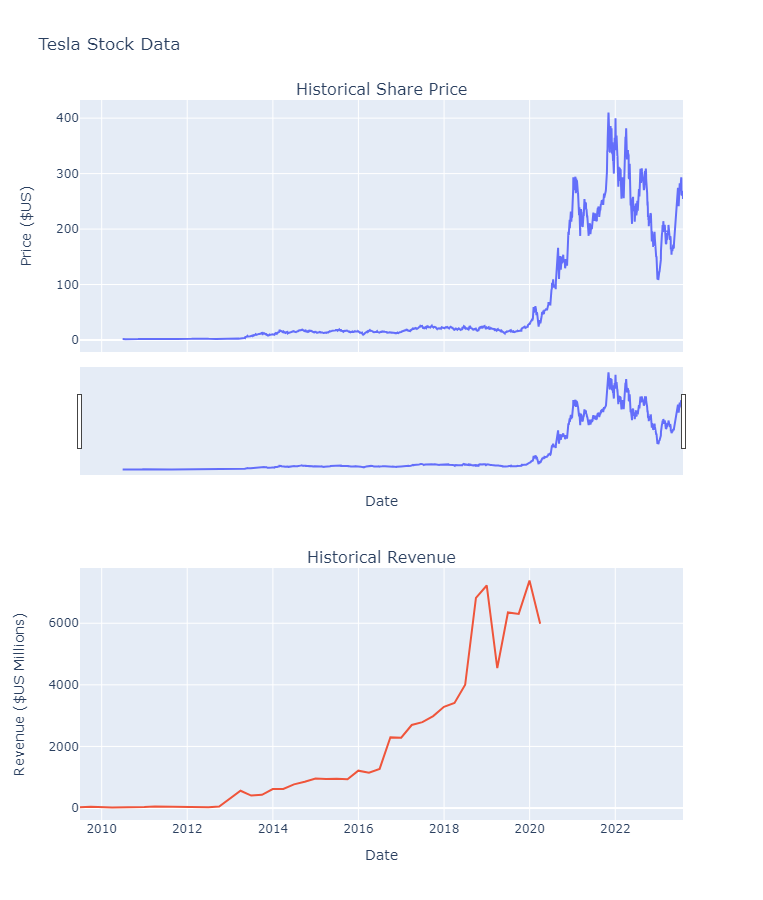

In [25]:
#Question 5: Plot Tesla Stock Graph
def make_graph(tesladata, tesla_revenue,Tesla):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = tesladata[tesladata.Date <= '2023-08-02']
    revenue_data_specific = tesla_revenue[tesla_revenue.Date <= '2020-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title='Tesla Stock Data',
    xaxis_rangeslider_visible=True)
    fig.show()
make_graph(tesladata, tesla_revenue,'Tesla Stock Data')   

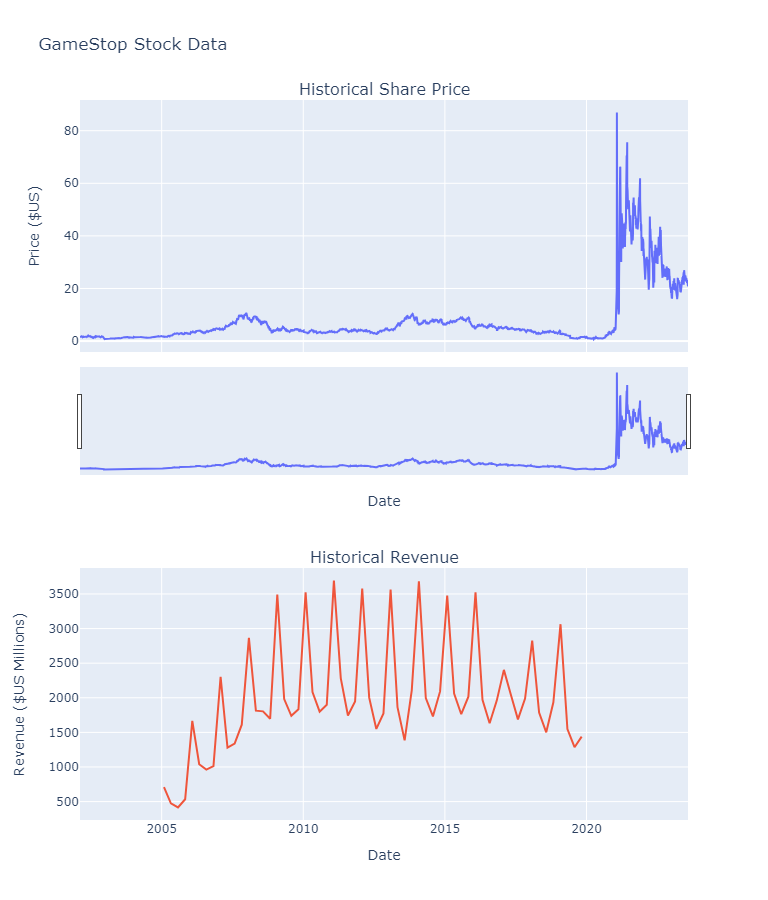

In [39]:
#Question6 Plot GameStop Stock Graph
def make_graph(gme_data, gme_revenue,gamestop):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = gme_data[gme_data.Date <= '2023-08-02']
    revenue_data_specific = gme_revenue[gme_revenue.Date <= '2020']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title='GameStop Stock Data',
    xaxis_rangeslider_visible=True)
    fig.show()
make_graph(html_data, gme_revenue,'GameStop Stock Data')   

In [35]:
print(type(html_data))

<class 'str'>
